<a href="https://colab.research.google.com/github/swapnil2009/DataScience/blob/main/Malaria_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Malaria Detection**

##<b>Problem Definition</b>

Train the model to identify images of cells infected by Plasmodium parasite.

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


###<b> Mounting the Drive

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <b>Loading libraries</b>

In [3]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

 <b>Loading the data</b>

In [4]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model.

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [5]:
# Storing the path of the extracted "train" folder
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [6]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:

    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:

            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                train_labels.append(1)

            else:

                train_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [7]:
# Storing the path of the extracted "test" folder
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [8]:
# Let's run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:

    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b> Checking the shape of train and test images

In [9]:
# Shape of images
print(train_images.shape)
print(test_images.shape)

(24958, 64, 64, 3)
(2600, 64, 64, 3)


###<b> Checking the shape of train and test labels

In [10]:
# Shape of labels
print(train_labels.shape)
print(test_labels.shape)


(24958,)
(2600,)


####<b> Observations and insights: </b>
- The images are 64 by 64 pixel where each pixel has RBG component, so 3 pieces of data where each is a Red, Blue and Green component.


### <b>Check the minimum and maximum range of pixel values for train and test images

In [11]:
# Checking Pixel values to make sure the values are balanced
# Check the minimum and maximum pixel values for training images
print("Minimum pixel value in training images:", train_images.min())
print("Maximum pixel value in training images:", train_images.max())

# Check the minimum and maximum pixel values for testing images
print("Minimum pixel value in testing images:", test_images.min())
print("Maximum pixel value in testing images:", test_images.max())


Minimum pixel value in training images: 0
Maximum pixel value in training images: 255
Minimum pixel value in testing images: 0
Maximum pixel value in testing images: 255


Its clearly the 256 color values for pixels

###<b> Count the number of values in both uninfected and parasitized

In [12]:
# Counting to make sure data is balanced

# Counting the number of parasitized and uninfected images in the training set
parasitized_count = np.sum(train_labels == 1)
uninfected_count = np.sum(train_labels == 0)

print("Number of parasitized images:", parasitized_count)
print("Number of uninfected images:", uninfected_count)


Number of parasitized images: 12582
Number of uninfected images: 12376


###<b>Normalize the images

In [13]:
# Trying to normalize the train and test images by dividing it by 255 and converting them to float32 using astype function
train_images = (train_images/255).astype('float32')
test_images = (test_images/255).astype('float32')

We normalize the data for two reasons
#Performance#
 Neural networks generally work best when the input data is within a specific range, typically between 0 and 1. Image data usually has pixel values ranging from 0 to 255, representing the intensity of red, green, and blue (RGB) colors. By dividing by 255, we scale all pixel values to fall between 0 and 1. This helps the network learn more efficiently and converge faster.

#Preventing Exploding Gradients#
Very large input values can lead to a problem called "exploding gradients," which can hinder the training process. Normalization helps to mitigate this issue.#

###<b> Plot to check if the data is balanced

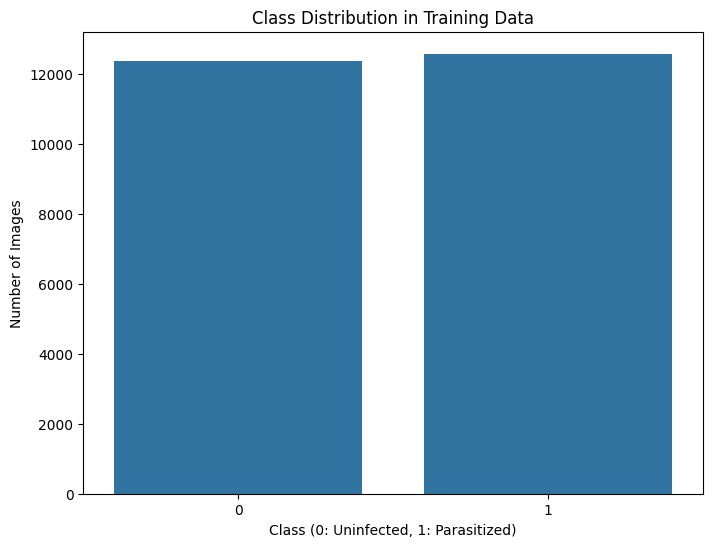

In [14]:


# Create a bar plot to visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=train_labels)
plt.title('Class Distribution in Training Data')
plt.xlabel('Class (0: Uninfected, 1: Parasitized)')
plt.ylabel('Number of Images')
plt.show()


The plot shows that the data is balanced.

### <b>Data Exploration</b>
Let's visualize the images from the train data

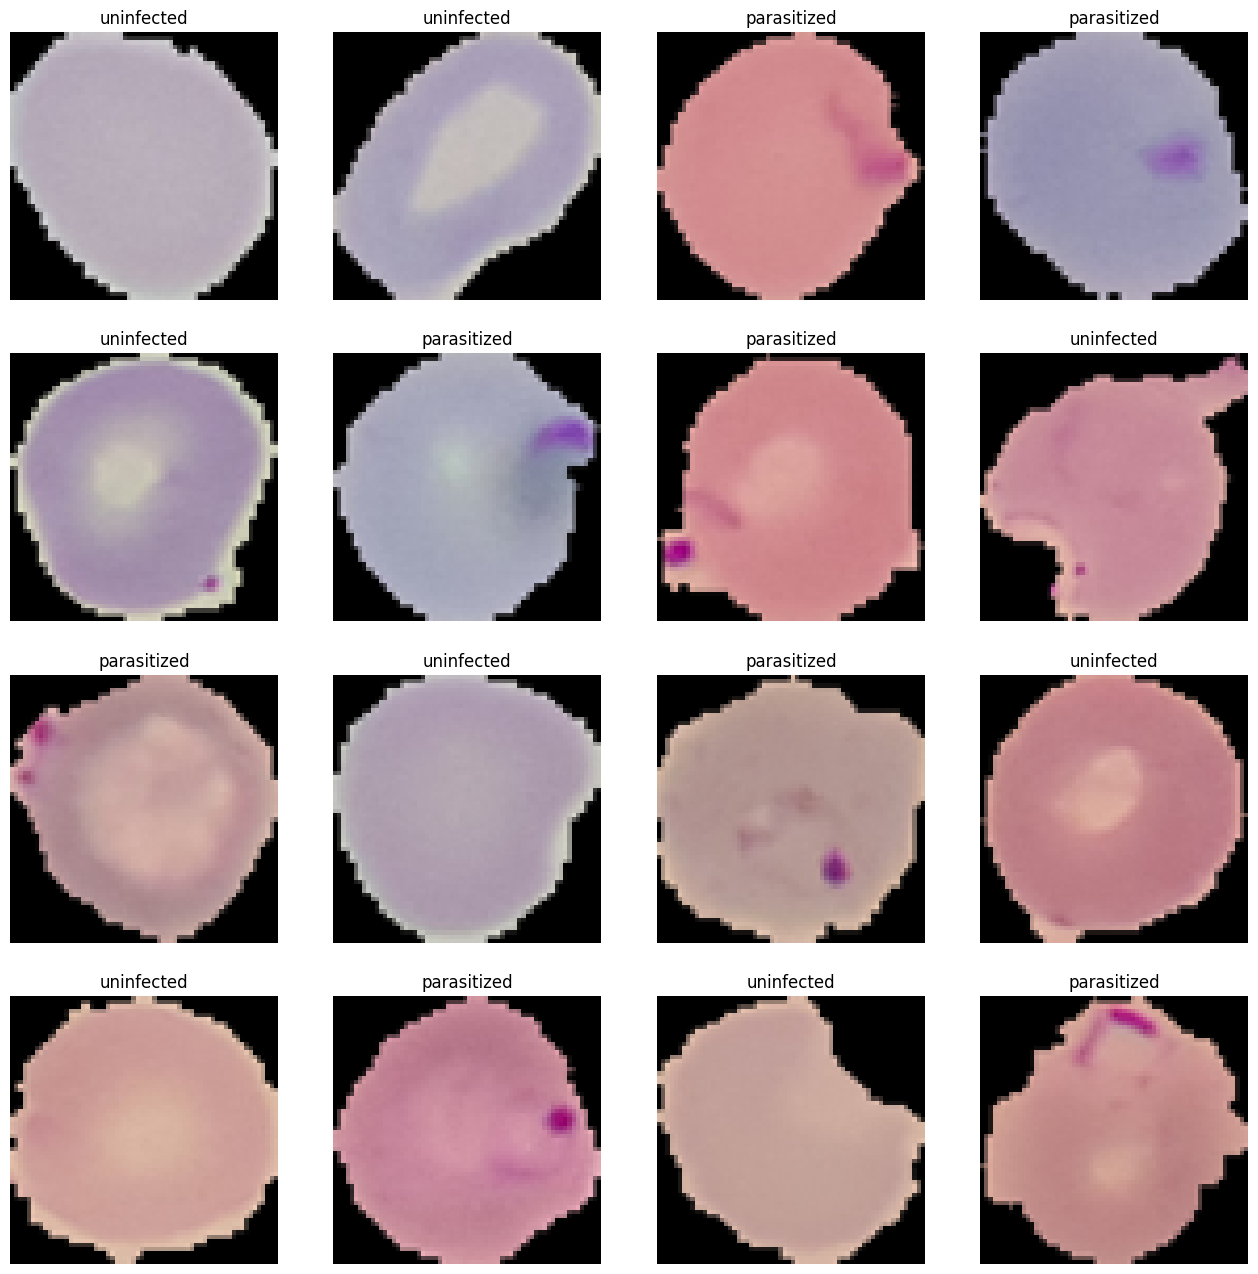

In [15]:
# This code will  visualize both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1:

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

The parasitized cells all have some abnormal dark spots somewhere in the cell whereas the uninfected cells do not.

###<b> Similarly visualize the images with subplot(6, 6) and figsize = (12, 12)

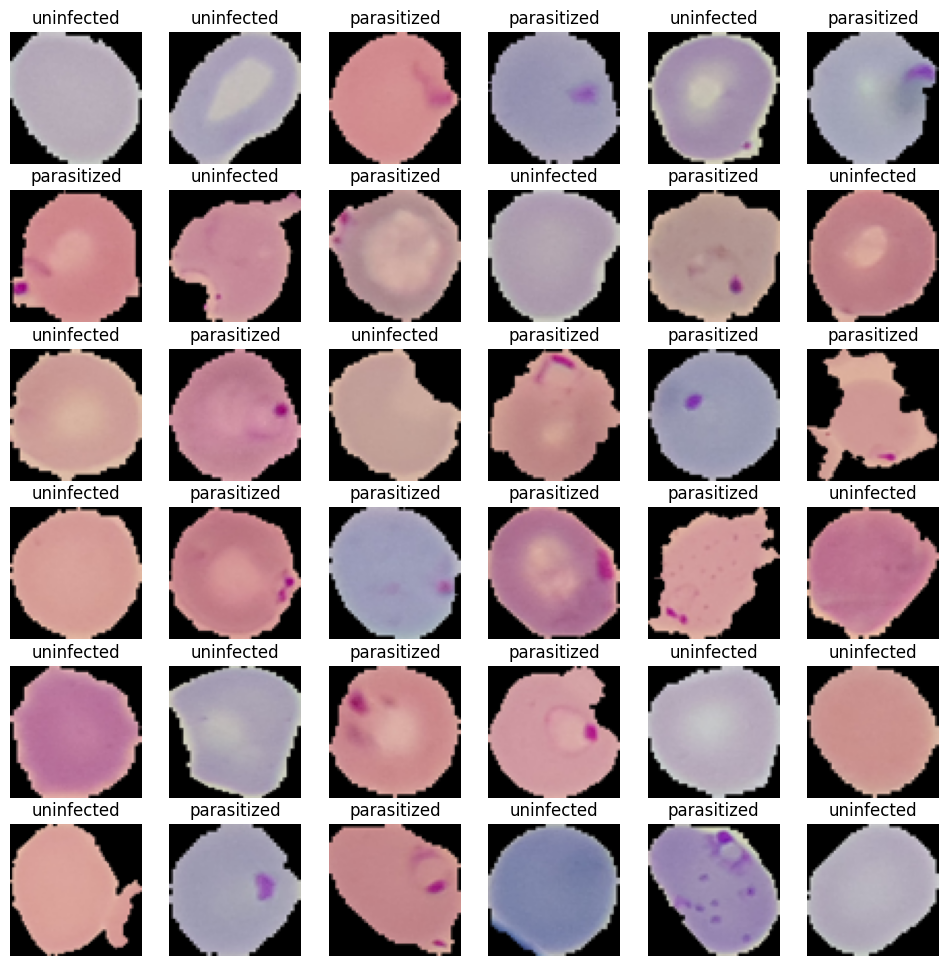

In [16]:
np.random.seed(42)

plt.figure(1, figsize = (12 , 12))

for n in range(1, 37):

    plt.subplot(6, 6, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1:

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

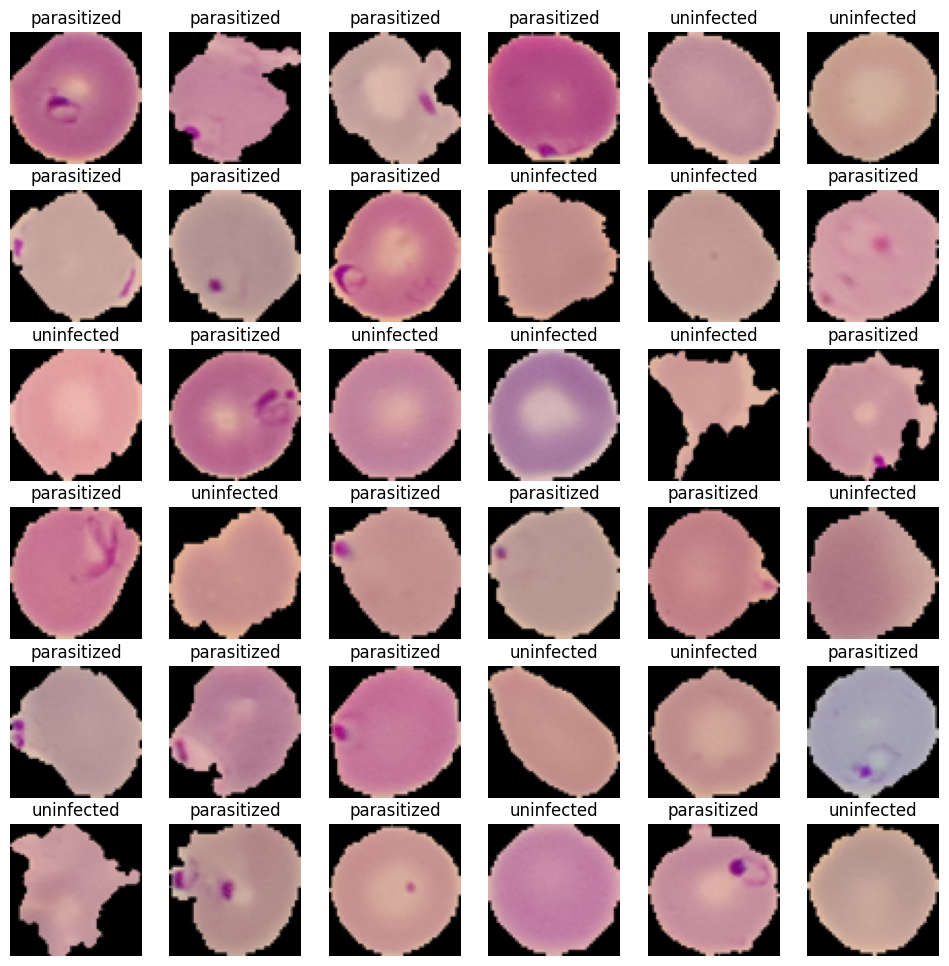

In [17]:


np.random.seed(42)

plt.figure(1, figsize = (12 , 12))

for n in range(1, 37):

    plt.subplot(6, 6, n)

    index = int(np.random.randint(0, test_images.shape[0], 1))

    if test_labels[index] == 1:

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(test_images[index])

    plt.axis('off')


####<b>Observations and insights:</b>

1.   Infected cells have dark spots in them

2.   uninfected cells do not have dark spots in them



###<b> Plotting the mean images for parasitized and uninfected

In [19]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

<b> Mean image for parasitized

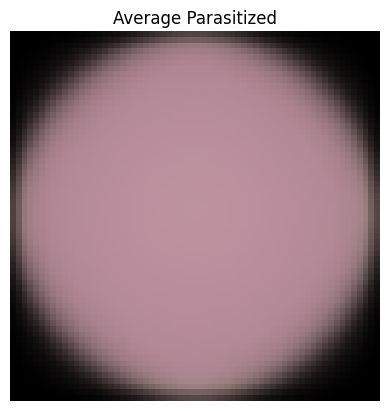

In [20]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:

              parasitized_data.append([img])

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

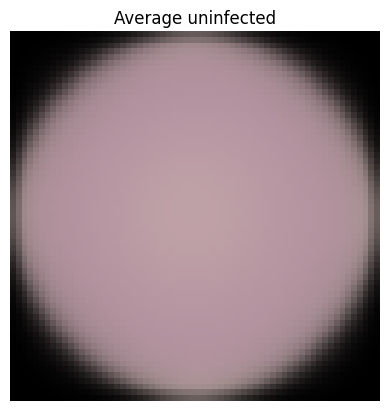

In [21]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
uninfected_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 0:

              uninfected_data.append([img])

uninfected_mean = find_mean_img(np.array(uninfected_data), 'uninfected')   # find the mean




####<b> Observations and insights: </b>
- The mean image of both the infected and uninfected cell looks round which looks like the average shape of the cell.
- The average uninfected image looks a bit brighter than the infected one, possibly due to the many dark spots (parasites) present in the infected cells.


### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [22]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)

  gfx.append(a)

gfx = np.array(gfx)

####<b>a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV): </b>

This command executes the color conversion. It uses the cv2.cvtColor() function to convert the current image (train_images[i]) from the BGR (Blue, Green, Red) color space to the HSV (Hue, Saturation, Value) color space.

OpenCV often represents images in BGR order instead of RGB.
cv2.COLOR_BGR2HSV is a flag that specifies the desired color conversion.

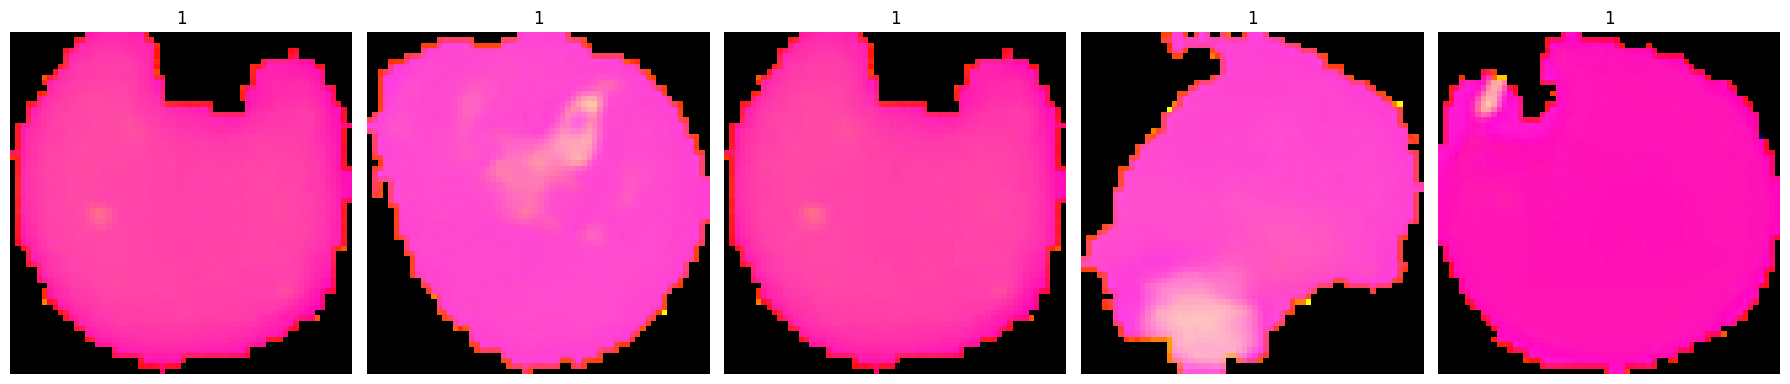

In [29]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

###<b> Converting the test data

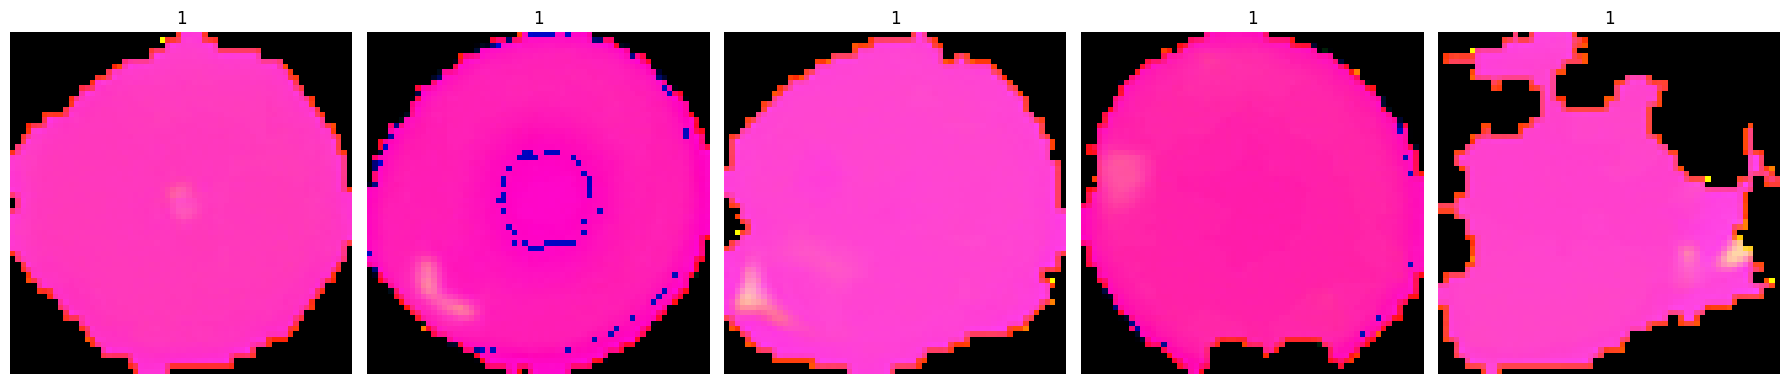

In [30]:
# Similarly we can visualize for the images in the test data
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

####<b>Observations and insights: </b>
The color abnormalities are highlighted.

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [31]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

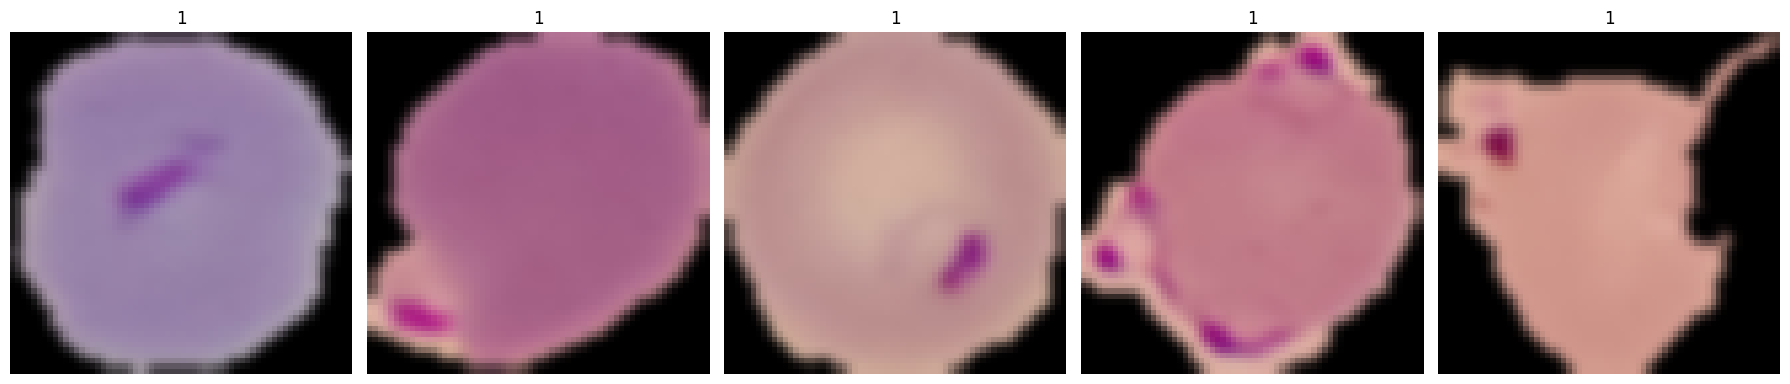

In [32]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)


  ax[t].imshow(gbx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

#<b> Important Note</b>
Gaussian Blurring is a technique used to reduce noise and detail in an image by applying a Gaussian function. It essentially smooths out the image by averaging the pixel values within a neighborhood defined by the Gaussian function.

Here are its benefits and how it might be relevant to the malaria detection task:

1. Noise Reduction:
Microscopic images often contain noise due to various factors like sensor limitations or imperfections in the sample preparation. Gaussian blurring can help to reduce this noise by averaging out random variations in pixel values, making the image appear smoother and potentially improving the performance of image analysis algorithms.

2. Detail Reduction:
In some cases, excessive detail in an image can be distracting or irrelevant for the task at hand. Gaussian blurring can help to reduce this detail by smoothing out sharp edges and textures. In the malaria detection context, this might help to focus on the overall cell structure and the presence of parasites rather than fine-grained details within the cell.

3. Pre-processing for Feature Extraction:
 Gaussian blurring can be used as a pre-processing step before applying feature extraction algorithms. By reducing noise and detail, it can make it easier for algorithms to identify relevant features in the image, such as the shape of the cell or the presence of dark spots associated with parasites.

4. Improving Generalization: By reducing the impact of noise and irrelevant details, Gaussian blurring can help to improve the generalization ability of machine learning models trained on the images. This means that the model is less likely to be overfit to the specific training data and is more likely to perform well on unseen images.

Relevance to Malaria Detection:

In the malaria detection task, Gaussian blurring could be applied to:

1. Reduce noise in the microscopic images, making it easier to identify the presence of parasites.

2. Smooth out the cell boundaries, potentially making it easier to segment the cells from the background.

3. Reduce the impact of irrelevant details within the cells, focusing the attention of the model on the key features related to infection.

However:

The effectiveness of Gaussian blurring depends on the specific characteristics of the images and the task at hand.
Excessive blurring can lead to loss of important information, potentially hindering the performance of the detection algorithm.
It's crucial to carefully choose the blurring parameters (e.g., kernel size) to achieve the desired effect without sacrificing essential information.

###<b> Gaussian Blurring on test data

###<B>One Hot Encoding on the train and test labels

In [35]:


from tensorflow.keras.utils import to_categorical

# Perform one-hot encoding on the train labels
train_labels_encoded = to_categorical(train_labels)

# Perform one-hot encoding on the test labels
test_labels_encoded = to_categorical(test_labels)


In [36]:
# Encoding Train Labels
train_labels = to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test_labels = to_categorical(test_labels, 2)

### **Base Model**



###<b> Importing the required libraries for building and training our Model

In [37]:
# Clearing backend
import tensorflow as tf

from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

###<b> Building the model

In [38]:
# Creating sequential model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,058,786 (4.04 MB)

 Trainable params: 1,058,786 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

###<b> Compiling the model

In [39]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks

In [40]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.keras', monitor = 'val_loss', save_best_only = True)] # Changed the file extension to .keras

<b> Fit and train our Model

In [41]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ]
history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 59s 92ms/step - accuracy: 0.7257 - loss: 0.5323 - val_accuracy: 0.9097 - val_loss: 0.1973
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 78s 85ms/step - accuracy: 0.9543 - loss: 0.1255 - val_accuracy: 0.9748 - val_loss: 0.1478
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 83s 87ms/step - accuracy: 0.9693 - loss: 0.1029 - val_accuracy: 0.9898 - val_loss: 0.0905
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.9745 - loss: 0.0817 - val_accuracy: 0.9850 - val_loss: 0.0978
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.9770 - loss: 0.0701 - val_accuracy: 0.9888 - val_loss: 0.0747
Epoch 6/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 79s 81ms/step - accuracy: 0.9761 - loss: 0.0686 - val_accuracy: 0.9804 - val_loss: 0.0827
Epoch 7/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.9777 - loss: 0.0658 - val_accuracy: 0.9840 - val_loss: 0.0632
Epoch 8/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 84s 85ms/step - accuracy: 0.9784 - loss: 0.0607 - 

KeyboardInterrupt: 

###<b> Evaluating the model on test data

In [42]:
accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9898 - loss: 0.0325

 Test_Accuracy:- 0.9876922965049744


<b> Plotting the confusion matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1300
           1       0.98      0.99      0.99      1300

    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600



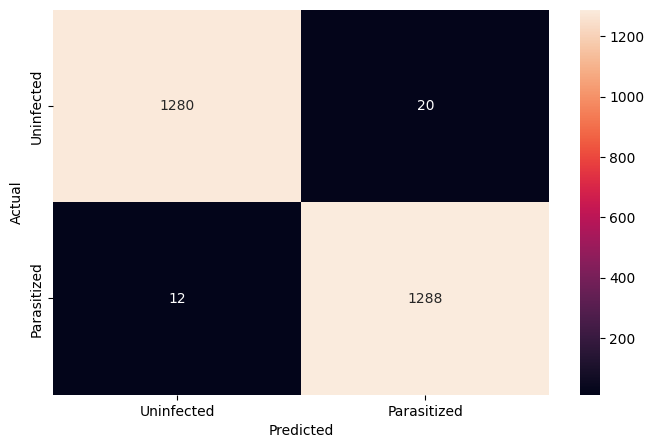

In [43]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b>Plotting the train and validation curves

In [44]:
# Function to plot train and validation accuracy
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")

    plt.xlabel("Epochs")

    plt.ylabel("Accuracy")

    plt.legend(loc="upper left")

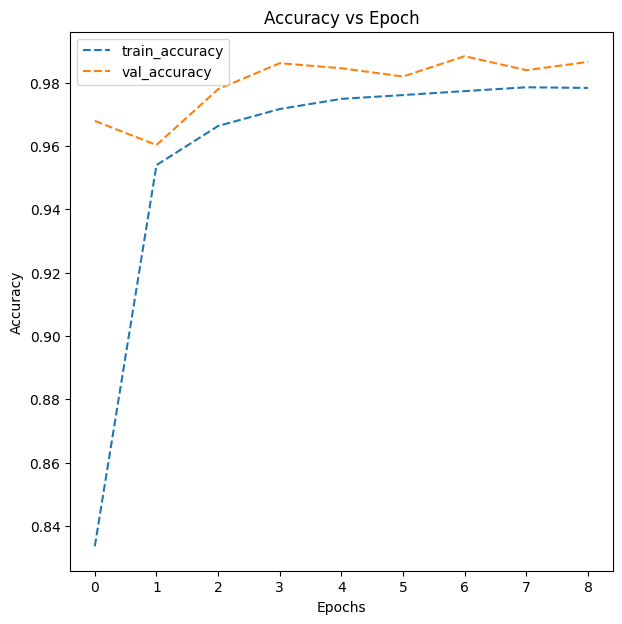

In [ ]:
plot_accuracy(history)



* Here we can clearly observe that the training and valiation accuracy are increasing
* And we can also notice that validation accuracy is slightly higher than the train accuracy